# ROC_CURVE_METHOD

## Loading_Libraries

In [42]:


import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Import_Dataset

#### Cancer_data_set 

In [6]:
data = pd.read_csv(r"C:\Users\JIBSON JOY\projects\ROC_Curve_Model\breast_cancer_data.csv")

### Mapping

In [7]:

data.drop(['id','Unnamed: 32'],axis=1,inplace=True)
# map function for mapping benign into 0 and malignant into 1
data['diagnosis'] = data['diagnosis'].map({'B':0,'M':1})

X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

### Finding Outliers

c:\Users\JIBSON JOY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='texture_mean'>

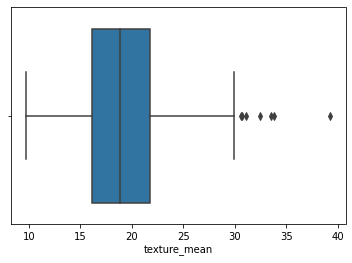

In [44]:
sns.boxplot(data['texture_mean'])

In [46]:
numericalColumns = data.select_dtypes(include=np.number).columns
numericalColumns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [48]:
descriateCols=[]
continuesCols=[]

for column in numericalColumns:
    if data[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [51]:
for column in continuesCols:
    upper_lim=data[column].mean()+data[column].std() *3
    lower_lim=data[column].mean()-data[column].std() *3

    data.loc[(data[column] > upper_lim),column] = upper_lim
    data.loc[(data[column] < lower_lim),column] = lower_lim

c:\Users\JIBSON JOY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='texture_mean'>

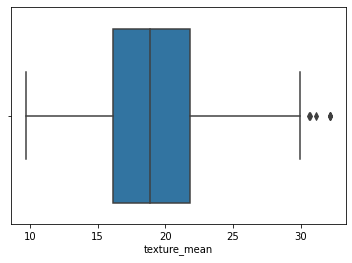

In [54]:
sns.boxplot(data['texture_mean'])

### Scaling_Down

In [55]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Using RandomforestClassifier

In [56]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled,y_train)
ytrain_pred=rf_model.predict_proba(X_train_scaled)

print(f"RF training ROC- AUC Accuarcy is : {roc_auc_score(y_train,ytrain_pred[:,1])}")
ytest_prob = rf_model.predict_proba(X_test_scaled)
print(f"RF test ROC- AUC Accuarcy is : {roc_auc_score(y_test,ytest_prob[:,1])}")

RF training ROC- AUC Accuarcy is : 1.0
RF test ROC- AUC Accuarcy is : 0.9943258912051314


### Using Logistic_Regression

In [57]:

log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)
ytrain_pred=log_model.predict_proba(X_train_scaled)

print(f"Logistic Reg training ROC- AUC Accuarcy is : {roc_auc_score(y_train,ytrain_pred[:,1])}")
ytest_prob = log_model.predict_proba(X_test_scaled)
print(f"Logistic Reg  test ROC- AUC Accuarcy is : {roc_auc_score(y_test,ytest_prob[:,1])}")

Logistic Reg training ROC- AUC Accuarcy is : 0.9970485096434833
Logistic Reg  test ROC- AUC Accuarcy is : 0.9972862957937585


### Using AdaboostClassifier

In [58]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_scaled,y_train)
ytrain_pred=ada_model.predict_proba(X_train_scaled)

print(f"Adaboost training ROC- AUC Accuarcy is : {roc_auc_score(y_train,ytrain_pred[:,1])}")
ytest_prob = ada_model.predict_proba(X_test_scaled)
print(f"Adaboost   test ROC- AUC Accuarcy is : {roc_auc_score(y_test,ytest_prob[:,1])}")

Adaboost training ROC- AUC Accuarcy is : 1.0
Adaboost   test ROC- AUC Accuarcy is : 0.9861847785864069


### Using KNeighborsClassifier

In [59]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)
ytrain_pred=knn_model.predict_proba(X_train_scaled)

print(f"Adaboost training ROC- AUC Accuarcy is : {roc_auc_score(y_train,ytrain_pred[:,1])}")
ytest_prob = knn_model.predict_proba(X_test_scaled)
print(f"Adaboost   test ROC- AUC Accuarcy is : {roc_auc_score(y_test,ytest_prob[:,1])}")

Adaboost training ROC- AUC Accuarcy is : 0.9981735827001754
Adaboost   test ROC- AUC Accuarcy is : 0.9782903663500677


#### Using append fn. for save the series into the list

In [69]:
pred =[]
for model in [rf_model,log_model,ada_model,knn_model]:
   pred.append(pd.Series(model.predict_proba(X_test_scaled)[:,1]))

final_prediction = pd.concat(pred,axis=1).mean(axis=1)

In [70]:
final_prediction


0      0.161286
1      0.953685
2      0.911076
3      0.095028
4      0.051629
         ...   
183    0.881400
184    0.943433
185    0.868131
186    0.490877
187    0.116375
Length: 188, dtype: float64

### Calculate the ROC curve

In [84]:
fpr, tpr, thresholds = roc_curve(y_test,final_prediction)

In [85]:
thresholds


array([1.9617185 , 0.9617185 , 0.61116908, 0.44755593, 0.43562473,
       0.38814931, 0.37590947, 0.2446803 , 0.22769622, 0.05162852])

In [86]:
accuracy_ls=[]

for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred))

In [87]:
acc_list = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
acc_list.columns =['Threshold','Accuarcy']
acc_list.sort_values(by='Accuarcy',ascending=False,inplace=True)


In [88]:
acc_list

,Threshold,Accuarcy
2,0.611169,0.978723
3,0.447556,0.968085
4,0.435625,0.962766
5,0.388149,0.952128
6,0.375909,0.946809
7,0.244680,0.930851
8,0.227696,0.925532
0,1.961718,0.643617
1,0.961718,0.643617
9,0.051629,0.361702
